In [2]:
import numpy as np
import gym
import my_tictactoe ## Custom Tic-Tac-Toe environment. See ReadME for instructions on installing

In [3]:
def transform(state): ### Function to transform the 2D state matrix to a 1D list
    out = []
    for i in range(0,3):
        for j in range(0,3):
            out.append(state[i][j])
    return out

In [4]:
def map_state(state): ### Function to give a mapping of the states with an integer
    total = 0
    for i in range(0,9):
        if(state[i]=='_'):
            total+=(3**i)*0
        elif(state[i]=='x'):
            total+=(3**i)*1
        elif(state[i]=='o'):
            total+=(3**i)*2
    return total

In [5]:
def action_set(state):    ### Function to return available actions
    act = []
    for i in range(0,9):
        if(state[i]=='_'):
            act.append(i)
    return act

In [6]:
env = gym.make('my_tictactoe-v0')

In [7]:
def epsilon_greedy(Q,s,a_set=[0,1,2,3,4,5,6,7,8]):   ### Function to select an action epsilon greedily. Epsilon = 0.1
    pr = np.random.choice([0,1], p = [0.1,0.9])
    if(pr == 0):
        a = np.random.choice(a_set)
    else:
        temp = np.max(Q[s,a_set])
        for i in range(0,9):
            if Q[s,i] == temp:
                a = i
                break;
    return a

In [8]:
def greedy(Q,s,a_set=[1,2,3,4,5,6,7,8]):    ### Function to select an action greedily.
    pr = np.random.choice([0,1], p = [0,1])
    if(pr == 0):
        a = np.random.choice(a_set)
    else:
        temp = np.max(Q[s,a_set])
        for i in range(0,9):
            if Q[s,i] == temp:
                a = i
                break;
    return a

In [9]:
def safe_choice(state,a_set):    ### Safe choice opponent
    for i in range(0,3):
        if(state[i][0]==state[i][1] and state[i][2] == '_' and state[i][0]=='x'):
            return (i*3+2)
        if(state[i][1]==state[i][2] and state[i][0] == '_' and state[i][1]=='x'):
            return (i*3+0)
        if(state[i][2]==state[i][0] and state[i][1] == '_' and state[i][2]=='x'):
            return (i*3+1)
        
        
        if(state[0][i]==state[1][i] and state[2][i] == '_' and state[0][i]=='x'):
            return (2*3+i)
        if(state[1][i]==state[2][i] and state[0][i] == '_' and state[1][i]=='x'):
            return (0*3+i)
        if(state[2][i]==state[0][i] and state[1][i] == '_' and state[2][i]=='x'):
            return (1*3+i)
        
        
    if(state[0][0]==state[1][1] and state[2][2] == '_' and state[0][0]=='x'):
        return (8)
    if(state[1][1]==state[2][2] and state[0][0] == '_' and state[1][1]=='x'):
        return (0)
    if(state[2][2]==state[0][0] and state[1][1] == '_' and state[2][2]=='x'):
        return (4)

    if(state[0][2]==state[1][1] and state[2][0] == '_' and state[0][2]=='x'):
        return (6)
    if(state[1][1]==state[2][0] and state[0][2] == '_' and state[1][1]=='x'):
        return (2)
    if(state[2][0]==state[0][2] and state[1][1] == '_' and state[2][0]=='x'):
        return (4)
    return np.random.choice(a_set)

In [10]:
gama = 0.5
alpha = 0.7
noe = 10000  ### Number of epochs

In [11]:
env.reset()
env.reset_tally()

In [12]:
###############
###TRAINING ###
###############

In [13]:
Q = np.random.rand(3**9,9)  ## Q table
env.reset_tally()
ef_test = np.empty([50,2])
k = 0
for i in range(0,noe):
    print("Episode =", i)
    env.reset()
    s = 0
    a = epsilon_greedy(Q,s)
    state, reward, is_over, tally = env.act(a)
    state_tr = transform(state)
    a_set = action_set(state_tr)
    while(is_over!=1):
        r_tot = 0
        a_choice = safe_choice(state,a_set)
        state, reward, is_over, tally = env.act(a_choice) ## Training aganinst safe agent
        
        ## Uncomment the following two lines to see the steps of the opponent
#         env.print()
#         print(" ")


        state_tr = transform(state)
        a_set = action_set(state_tr)
        r_tot+=reward
        
        s = map_state(state_tr)
        if(len(a_set) == 0):
            break;
        a = epsilon_greedy(Q,s,a_set)

        
        state, reward, is_over, tally = env.act(a)
        state_tr = transform(state)
        sn = map_state(state_tr)
        a_set = action_set(state_tr)
        r_tot+=reward
        
        if(len(a_set) == 0):
            mx = 0
        else:
            mx = np.max(Q[sn,a_set])
        Q[s,a] = Q[s,a] + alpha*(r_tot + gama*mx - Q[s,a])
        
        ## Uncomment the following two lines to see the steps of the agent
#         env.print()
#         print("reward",reward)
#         print(" ")

    ## Uncomment the following two lines to see the result tally afte each epoch 
#     tl = env.print_tally()
#     print("Our agent won ",tl[0]," matches, opponent won ",tl[1]," matches.")
    print(" ")
    
    ## Checking efficacy as asked in the question
    if(i%200==0):
        ntest = 100
        env.reset()
        env.reset_tally()
        s = 0
        for j in range(0,ntest):
            print("Checking Efficacy, Episode", j)
            env.reset()
            s = 0
            a = greedy(Q,s)
            state, reward, is_over, tally = env.act(a)
            state_tr = transform(state)
            a_set = action_set(state_tr)

            while(is_over!=1):
                a_choice = safe_choice(state,a_set)
                state, reward, is_over, tally = env.act(a_choice)
                state_tr = transform(state)
                a_set = action_set(state_tr)
                s = map_state(state_tr)

                if(len(a_set) == 0):
                    break;

                a = greedy(Q,s,a_set)
                state, reward, is_over, tally = env.act(a)
                state_tr = transform(state)
                sn = map_state(state_tr)
                a_set = action_set(state_tr)
            temp = env.print_tally()
        ef_test[k,0] = temp[0]
        ef_test[k,1] = temp[1]
#         print("Our agent won ",ef_test[k,0]," matches, opponent won ",ef_test[k,1]," matches.")
        k+=1

Episode = 0
Player  2  wins the round
Game Over
 
Checking Efficacy, Episode 0
Player  1  wins the round
Checking Efficacy, Episode 1
Checking Efficacy, Episode 2
Player  1  wins the round
Checking Efficacy, Episode 3
Checking Efficacy, Episode 4
Player  1  wins the round
Checking Efficacy, Episode 5
Player  2  wins the round
Game Over
Checking Efficacy, Episode 6
Player  1  wins the round
Checking Efficacy, Episode 7
Player  1  wins the round
Checking Efficacy, Episode 8
Checking Efficacy, Episode 9
Checking Efficacy, Episode 10
Player  1  wins the round
Checking Efficacy, Episode 11
Checking Efficacy, Episode 12
Checking Efficacy, Episode 13
Player  1  wins the round
Checking Efficacy, Episode 14
Player  1  wins the round
Checking Efficacy, Episode 15
Checking Efficacy, Episode 16
Player  2  wins the round
Game Over
Checking Efficacy, Episode 17
Checking Efficacy, Episode 18
Checking Efficacy, Episode 19
Player  2  wins the round
Game Over
Checking Efficacy, Episode 20
Player  2  win

Player  2  wins the round
Game Over
 
Episode = 115
Player  2  wins the round
Game Over
 
Episode = 116
Player  2  wins the round
Game Over
 
Episode = 117
 
Episode = 118
Player  2  wins the round
Game Over
 
Episode = 119
Player  2  wins the round
Game Over
 
Episode = 120
 
Episode = 121
Player  2  wins the round
Game Over
 
Episode = 122
 
Episode = 123
Player  2  wins the round
Game Over
 
Episode = 124
Player  2  wins the round
Game Over
 
Episode = 125
Player  2  wins the round
Game Over
 
Episode = 126
 
Episode = 127
Player  2  wins the round
Game Over
 
Episode = 128
 
Episode = 129
Player  2  wins the round
Game Over
 
Episode = 130
Player  2  wins the round
Game Over
 
Episode = 131
Player  2  wins the round
Game Over
 
Episode = 132
 
Episode = 133
 
Episode = 134
Player  1  wins the round
 
Episode = 135
 
Episode = 136
Player  2  wins the round
Game Over
 
Episode = 137
 
Episode = 138
 
Episode = 139
Player  1  wins the round
 
Episode = 140
Player  2  wins the round
Ga

 
Episode = 247
Player  2  wins the round
Game Over
 
Episode = 248
Player  1  wins the round
 
Episode = 249
Player  2  wins the round
Game Over
 
Episode = 250
Player  2  wins the round
Game Over
 
Episode = 251
Player  1  wins the round
 
Episode = 252
Player  2  wins the round
Game Over
 
Episode = 253
Player  2  wins the round
Game Over
 
Episode = 254
Player  2  wins the round
Game Over
 
Episode = 255
 
Episode = 256
Player  1  wins the round
 
Episode = 257
 
Episode = 258
Player  2  wins the round
Game Over
 
Episode = 259
 
Episode = 260
Player  1  wins the round
 
Episode = 261
Player  2  wins the round
Game Over
 
Episode = 262
Player  2  wins the round
Game Over
 
Episode = 263
 
Episode = 264
Player  1  wins the round
 
Episode = 265
 
Episode = 266
 
Episode = 267
Player  2  wins the round
Game Over
 
Episode = 268
Player  2  wins the round
Game Over
 
Episode = 269
 
Episode = 270
Player  2  wins the round
Game Over
 
Episode = 271
 
Episode = 272
Player  2  wins the ro

Player  2  wins the round
Game Over
 
Episode = 520
 
Episode = 521
 
Episode = 522
 
Episode = 523
 
Episode = 524
 
Episode = 525
Player  2  wins the round
Game Over
 
Episode = 526
Player  2  wins the round
Game Over
 
Episode = 527
Player  1  wins the round
 
Episode = 528
Player  2  wins the round
Game Over
 
Episode = 529
 
Episode = 530
Player  2  wins the round
Game Over
 
Episode = 531
Player  2  wins the round
Game Over
 
Episode = 532
Player  2  wins the round
Game Over
 
Episode = 533
 
Episode = 534
 
Episode = 535
Player  2  wins the round
Game Over
 
Episode = 536
 
Episode = 537
 
Episode = 538
 
Episode = 539
 
Episode = 540
 
Episode = 541
Player  1  wins the round
 
Episode = 542
Player  2  wins the round
Game Over
 
Episode = 543
 
Episode = 544
Player  2  wins the round
Game Over
 
Episode = 545
 
Episode = 546
Player  2  wins the round
Game Over
 
Episode = 547
Player  2  wins the round
Game Over
 
Episode = 548
 
Episode = 549
Player  2  wins the round
Game Over


Player  2  wins the round
Game Over
 
Episode = 769
Player  1  wins the round
 
Episode = 770
Player  1  wins the round
 
Episode = 771
Player  2  wins the round
Game Over
 
Episode = 772
 
Episode = 773
Player  2  wins the round
Game Over
 
Episode = 774
Player  2  wins the round
Game Over
 
Episode = 775
Player  2  wins the round
Game Over
 
Episode = 776
 
Episode = 777
 
Episode = 778
Player  2  wins the round
Game Over
 
Episode = 779
Player  1  wins the round
 
Episode = 780
 
Episode = 781
 
Episode = 782
Player  1  wins the round
 
Episode = 783
Player  2  wins the round
Game Over
 
Episode = 784
 
Episode = 785
Player  2  wins the round
Game Over
 
Episode = 786
Player  1  wins the round
 
Episode = 787
Player  2  wins the round
Game Over
 
Episode = 788
Player  1  wins the round
 
Episode = 789
Player  2  wins the round
Game Over
 
Episode = 790
Player  2  wins the round
Game Over
 
Episode = 791
Player  1  wins the round
 
Episode = 792
Player  2  wins the round
Game Over
 


 
Episode = 869
Player  2  wins the round
Game Over
 
Episode = 870
 
Episode = 871
 
Episode = 872
 
Episode = 873
Player  2  wins the round
Game Over
 
Episode = 874
 
Episode = 875
Player  1  wins the round
 
Episode = 876
Player  2  wins the round
Game Over
 
Episode = 877
Player  2  wins the round
Game Over
 
Episode = 878
 
Episode = 879
 
Episode = 880
Player  2  wins the round
Game Over
 
Episode = 881
Player  2  wins the round
Game Over
 
Episode = 882
Player  2  wins the round
Game Over
 
Episode = 883
 
Episode = 884
 
Episode = 885
Player  2  wins the round
Game Over
 
Episode = 886
 
Episode = 887
Player  2  wins the round
Game Over
 
Episode = 888
 
Episode = 889
 
Episode = 890
Player  2  wins the round
Game Over
 
Episode = 891
 
Episode = 892
Player  2  wins the round
Game Over
 
Episode = 893
 
Episode = 894
 
Episode = 895
Player  2  wins the round
Game Over
 
Episode = 896
Player  2  wins the round
Game Over
 
Episode = 897
 
Episode = 898
 
Episode = 899
Player  1 

Player  1  wins the round
Checking Efficacy, Episode 86
Player  2  wins the round
Game Over
Checking Efficacy, Episode 87
Checking Efficacy, Episode 88
Player  1  wins the round
Checking Efficacy, Episode 89
Player  2  wins the round
Game Over
Checking Efficacy, Episode 90
Checking Efficacy, Episode 91
Player  1  wins the round
Checking Efficacy, Episode 92
Checking Efficacy, Episode 93
Checking Efficacy, Episode 94
Player  2  wins the round
Game Over
Checking Efficacy, Episode 95
Player  2  wins the round
Game Over
Checking Efficacy, Episode 96
Player  1  wins the round
Checking Efficacy, Episode 97
Checking Efficacy, Episode 98
Checking Efficacy, Episode 99
Episode = 1001
Player  2  wins the round
Game Over
 
Episode = 1002
 
Episode = 1003
Player  2  wins the round
Game Over
 
Episode = 1004
Player  1  wins the round
 
Episode = 1005
Player  2  wins the round
Game Over
 
Episode = 1006
Player  2  wins the round
Game Over
 
Episode = 1007
Player  2  wins the round
Game Over
 
Episode

Player  2  wins the round
Game Over
 
Episode = 1216
Player  2  wins the round
Game Over
 
Episode = 1217
 
Episode = 1218
Player  2  wins the round
Game Over
 
Episode = 1219
 
Episode = 1220
 
Episode = 1221
 
Episode = 1222
Player  2  wins the round
Game Over
 
Episode = 1223
 
Episode = 1224
 
Episode = 1225
 
Episode = 1226
Player  2  wins the round
Game Over
 
Episode = 1227
 
Episode = 1228
 
Episode = 1229
 
Episode = 1230
Player  1  wins the round
 
Episode = 1231
Player  1  wins the round
 
Episode = 1232
 
Episode = 1233
 
Episode = 1234
 
Episode = 1235
Player  2  wins the round
Game Over
 
Episode = 1236
 
Episode = 1237
Player  2  wins the round
Game Over
 
Episode = 1238
Player  2  wins the round
Game Over
 
Episode = 1239
 
Episode = 1240
 
Episode = 1241
 
Episode = 1242
 
Episode = 1243
 
Episode = 1244
Player  2  wins the round
Game Over
 
Episode = 1245
 
Episode = 1246
 
Episode = 1247
Player  2  wins the round
Game Over
 
Episode = 1248
Player  2  wins the round
G

Player  2  wins the round
Game Over
 
Episode = 1547
 
Episode = 1548
 
Episode = 1549
 
Episode = 1550
 
Episode = 1551
Player  2  wins the round
Game Over
 
Episode = 1552
Player  2  wins the round
Game Over
 
Episode = 1553
Player  2  wins the round
Game Over
 
Episode = 1554
Player  2  wins the round
Game Over
 
Episode = 1555
 
Episode = 1556
Player  2  wins the round
Game Over
 
Episode = 1557
Player  1  wins the round
 
Episode = 1558
Player  2  wins the round
Game Over
 
Episode = 1559
Player  2  wins the round
Game Over
 
Episode = 1560
 
Episode = 1561
 
Episode = 1562
Player  2  wins the round
Game Over
 
Episode = 1563
Player  1  wins the round
 
Episode = 1564
Player  1  wins the round
 
Episode = 1565
Player  2  wins the round
Game Over
 
Episode = 1566
Player  2  wins the round
Game Over
 
Episode = 1567
Player  2  wins the round
Game Over
 
Episode = 1568
 
Episode = 1569
Player  2  wins the round
Game Over
 
Episode = 1570
 
Episode = 1571
Player  2  wins the round
Gam

 
Episode = 1682
Player  2  wins the round
Game Over
 
Episode = 1683
Player  1  wins the round
 
Episode = 1684
Player  2  wins the round
Game Over
 
Episode = 1685
 
Episode = 1686
Player  2  wins the round
Game Over
 
Episode = 1687
Player  2  wins the round
Game Over
 
Episode = 1688
Player  2  wins the round
Game Over
 
Episode = 1689
 
Episode = 1690
Player  2  wins the round
Game Over
 
Episode = 1691
 
Episode = 1692
Player  2  wins the round
Game Over
 
Episode = 1693
 
Episode = 1694
Player  2  wins the round
Game Over
 
Episode = 1695
Player  2  wins the round
Game Over
 
Episode = 1696
 
Episode = 1697
Player  2  wins the round
Game Over
 
Episode = 1698
Player  2  wins the round
Game Over
 
Episode = 1699
Player  1  wins the round
 
Episode = 1700
 
Episode = 1701
Player  1  wins the round
 
Episode = 1702
 
Episode = 1703
Player  1  wins the round
 
Episode = 1704
 
Episode = 1705
 
Episode = 1706
Player  2  wins the round
Game Over
 
Episode = 1707
 
Episode = 1708
Playe

Player  2  wins the round
Game Over
 
Episode = 1987
 
Episode = 1988
Player  2  wins the round
Game Over
 
Episode = 1989
Player  2  wins the round
Game Over
 
Episode = 1990
 
Episode = 1991
Player  2  wins the round
Game Over
 
Episode = 1992
Player  2  wins the round
Game Over
 
Episode = 1993
Player  2  wins the round
Game Over
 
Episode = 1994
Player  2  wins the round
Game Over
 
Episode = 1995
Player  1  wins the round
 
Episode = 1996
 
Episode = 1997
Player  2  wins the round
Game Over
 
Episode = 1998
 
Episode = 1999
Player  1  wins the round
 
Episode = 2000
Player  2  wins the round
Game Over
 
Checking Efficacy, Episode 0
Checking Efficacy, Episode 1
Checking Efficacy, Episode 2
Player  2  wins the round
Game Over
Checking Efficacy, Episode 3
Checking Efficacy, Episode 4
Player  2  wins the round
Game Over
Checking Efficacy, Episode 5
Player  2  wins the round
Game Over
Checking Efficacy, Episode 6
Player  2  wins the round
Game Over
Checking Efficacy, Episode 7
Checking

 
Episode = 2190
 
Episode = 2191
Player  2  wins the round
Game Over
 
Episode = 2192
 
Episode = 2193
Player  2  wins the round
Game Over
 
Episode = 2194
 
Episode = 2195
 
Episode = 2196
 
Episode = 2197
Player  2  wins the round
Game Over
 
Episode = 2198
Player  2  wins the round
Game Over
 
Episode = 2199
 
Episode = 2200
Player  2  wins the round
Game Over
 
Checking Efficacy, Episode 0
Checking Efficacy, Episode 1
Player  2  wins the round
Game Over
Checking Efficacy, Episode 2
Player  2  wins the round
Game Over
Checking Efficacy, Episode 3
Checking Efficacy, Episode 4
Player  2  wins the round
Game Over
Checking Efficacy, Episode 5
Checking Efficacy, Episode 6
Checking Efficacy, Episode 7
Checking Efficacy, Episode 8
Player  1  wins the round
Checking Efficacy, Episode 9
Player  2  wins the round
Game Over
Checking Efficacy, Episode 10
Player  2  wins the round
Game Over
Checking Efficacy, Episode 11
Checking Efficacy, Episode 12
Player  2  wins the round
Game Over
Checking 

 
Episode = 2436
 
Episode = 2437
Player  2  wins the round
Game Over
 
Episode = 2438
Player  2  wins the round
Game Over
 
Episode = 2439
Player  2  wins the round
Game Over
 
Episode = 2440
 
Episode = 2441
Player  2  wins the round
Game Over
 
Episode = 2442
 
Episode = 2443
 
Episode = 2444
Player  2  wins the round
Game Over
 
Episode = 2445
 
Episode = 2446
Player  2  wins the round
Game Over
 
Episode = 2447
Player  2  wins the round
Game Over
 
Episode = 2448
Player  2  wins the round
Game Over
 
Episode = 2449
Player  2  wins the round
Game Over
 
Episode = 2450
Player  2  wins the round
Game Over
 
Episode = 2451
Player  2  wins the round
Game Over
 
Episode = 2452
Player  2  wins the round
Game Over
 
Episode = 2453
Player  2  wins the round
Game Over
 
Episode = 2454
Player  2  wins the round
Game Over
 
Episode = 2455
 
Episode = 2456
 
Episode = 2457
Player  2  wins the round
Game Over
 
Episode = 2458
 
Episode = 2459
 
Episode = 2460
Player  2  wins the round
Game Over

Player  2  wins the round
Game Over
Checking Efficacy, Episode 76
Player  2  wins the round
Game Over
Checking Efficacy, Episode 77
Player  2  wins the round
Game Over
Checking Efficacy, Episode 78
Checking Efficacy, Episode 79
Checking Efficacy, Episode 80
Checking Efficacy, Episode 81
Player  2  wins the round
Game Over
Checking Efficacy, Episode 82
Checking Efficacy, Episode 83
Checking Efficacy, Episode 84
Checking Efficacy, Episode 85
Player  1  wins the round
Checking Efficacy, Episode 86
Player  2  wins the round
Game Over
Checking Efficacy, Episode 87
Checking Efficacy, Episode 88
Player  1  wins the round
Checking Efficacy, Episode 89
Player  2  wins the round
Game Over
Checking Efficacy, Episode 90
Checking Efficacy, Episode 91
Player  2  wins the round
Game Over
Checking Efficacy, Episode 92
Checking Efficacy, Episode 93
Checking Efficacy, Episode 94
Checking Efficacy, Episode 95
Player  1  wins the round
Checking Efficacy, Episode 96
Checking Efficacy, Episode 97
Checking E

 
Episode = 2917
 
Episode = 2918
 
Episode = 2919
 
Episode = 2920
 
Episode = 2921
Player  1  wins the round
 
Episode = 2922
 
Episode = 2923
Player  1  wins the round
 
Episode = 2924
 
Episode = 2925
Player  2  wins the round
Game Over
 
Episode = 2926
 
Episode = 2927
 
Episode = 2928
Player  1  wins the round
 
Episode = 2929
Player  2  wins the round
Game Over
 
Episode = 2930
 
Episode = 2931
Player  2  wins the round
Game Over
 
Episode = 2932
 
Episode = 2933
 
Episode = 2934
 
Episode = 2935
Player  1  wins the round
 
Episode = 2936
Player  2  wins the round
Game Over
 
Episode = 2937
Player  2  wins the round
Game Over
 
Episode = 2938
Player  2  wins the round
Game Over
 
Episode = 2939
Player  1  wins the round
 
Episode = 2940
 
Episode = 2941
Player  2  wins the round
Game Over
 
Episode = 2942
Player  2  wins the round
Game Over
 
Episode = 2943
Player  1  wins the round
 
Episode = 2944
 
Episode = 2945
 
Episode = 2946
 
Episode = 2947
 
Episode = 2948
 
Episode = 

Player  2  wins the round
Game Over
 
Episode = 3036
 
Episode = 3037
 
Episode = 3038
 
Episode = 3039
Player  2  wins the round
Game Over
 
Episode = 3040
Player  2  wins the round
Game Over
 
Episode = 3041
 
Episode = 3042
Player  2  wins the round
Game Over
 
Episode = 3043
Player  1  wins the round
 
Episode = 3044
Player  2  wins the round
Game Over
 
Episode = 3045
Player  2  wins the round
Game Over
 
Episode = 3046
 
Episode = 3047
Player  2  wins the round
Game Over
 
Episode = 3048
 
Episode = 3049
Player  2  wins the round
Game Over
 
Episode = 3050
Player  2  wins the round
Game Over
 
Episode = 3051
Player  2  wins the round
Game Over
 
Episode = 3052
Player  1  wins the round
 
Episode = 3053
 
Episode = 3054
Player  1  wins the round
 
Episode = 3055
Player  2  wins the round
Game Over
 
Episode = 3056
 
Episode = 3057
 
Episode = 3058
Player  2  wins the round
Game Over
 
Episode = 3059
Player  2  wins the round
Game Over
 
Episode = 3060
Player  1  wins the round
 
E

 
Episode = 3251
 
Episode = 3252
 
Episode = 3253
 
Episode = 3254
 
Episode = 3255
 
Episode = 3256
Player  2  wins the round
Game Over
 
Episode = 3257
 
Episode = 3258
Player  2  wins the round
Game Over
 
Episode = 3259
Player  2  wins the round
Game Over
 
Episode = 3260
Player  2  wins the round
Game Over
 
Episode = 3261
Player  2  wins the round
Game Over
 
Episode = 3262
 
Episode = 3263
Player  2  wins the round
Game Over
 
Episode = 3264
 
Episode = 3265
Player  2  wins the round
Game Over
 
Episode = 3266
 
Episode = 3267
Player  1  wins the round
 
Episode = 3268
 
Episode = 3269
 
Episode = 3270
Player  2  wins the round
Game Over
 
Episode = 3271
 
Episode = 3272
Player  2  wins the round
Game Over
 
Episode = 3273
Player  2  wins the round
Game Over
 
Episode = 3274
Player  2  wins the round
Game Over
 
Episode = 3275
 
Episode = 3276
 
Episode = 3277
Player  2  wins the round
Game Over
 
Episode = 3278
 
Episode = 3279
 
Episode = 3280
 
Episode = 3281
 
Episode = 328

Game Over
Checking Efficacy, Episode 70
Checking Efficacy, Episode 71
Checking Efficacy, Episode 72
Checking Efficacy, Episode 73
Checking Efficacy, Episode 74
Checking Efficacy, Episode 75
Player  2  wins the round
Game Over
Checking Efficacy, Episode 76
Checking Efficacy, Episode 77
Player  2  wins the round
Game Over
Checking Efficacy, Episode 78
Player  2  wins the round
Game Over
Checking Efficacy, Episode 79
Checking Efficacy, Episode 80
Player  2  wins the round
Game Over
Checking Efficacy, Episode 81
Checking Efficacy, Episode 82
Checking Efficacy, Episode 83
Checking Efficacy, Episode 84
Player  2  wins the round
Game Over
Checking Efficacy, Episode 85
Player  2  wins the round
Game Over
Checking Efficacy, Episode 86
Player  2  wins the round
Game Over
Checking Efficacy, Episode 87
Player  1  wins the round
Checking Efficacy, Episode 88
Player  1  wins the round
Checking Efficacy, Episode 89
Checking Efficacy, Episode 90
Checking Efficacy, Episode 91
Player  1  wins the round


 
Episode = 3675
Player  2  wins the round
Game Over
 
Episode = 3676
Player  2  wins the round
Game Over
 
Episode = 3677
 
Episode = 3678
Player  1  wins the round
 
Episode = 3679
Player  1  wins the round
 
Episode = 3680
 
Episode = 3681
Player  2  wins the round
Game Over
 
Episode = 3682
 
Episode = 3683
 
Episode = 3684
Player  1  wins the round
 
Episode = 3685
 
Episode = 3686
 
Episode = 3687
 
Episode = 3688
Player  2  wins the round
Game Over
 
Episode = 3689
 
Episode = 3690
 
Episode = 3691
Player  2  wins the round
Game Over
 
Episode = 3692
 
Episode = 3693
 
Episode = 3694
 
Episode = 3695
 
Episode = 3696
 
Episode = 3697
 
Episode = 3698
 
Episode = 3699
 
Episode = 3700
 
Episode = 3701
 
Episode = 3702
 
Episode = 3703
Player  2  wins the round
Game Over
 
Episode = 3704
 
Episode = 3705
 
Episode = 3706
Player  1  wins the round
 
Episode = 3707
 
Episode = 3708
 
Episode = 3709
Player  2  wins the round
Game Over
 
Episode = 3710
 
Episode = 3711
Player  2  wins

 
Episode = 3996
Player  1  wins the round
 
Episode = 3997
 
Episode = 3998
Player  2  wins the round
Game Over
 
Episode = 3999
Player  2  wins the round
Game Over
 
Episode = 4000
 
Checking Efficacy, Episode 0
Checking Efficacy, Episode 1
Checking Efficacy, Episode 2
Player  2  wins the round
Game Over
Checking Efficacy, Episode 3
Player  2  wins the round
Game Over
Checking Efficacy, Episode 4
Checking Efficacy, Episode 5
Checking Efficacy, Episode 6
Checking Efficacy, Episode 7
Player  1  wins the round
Checking Efficacy, Episode 8
Checking Efficacy, Episode 9
Checking Efficacy, Episode 10
Player  1  wins the round
Checking Efficacy, Episode 11
Player  2  wins the round
Game Over
Checking Efficacy, Episode 12
Player  1  wins the round
Checking Efficacy, Episode 13
Player  1  wins the round
Checking Efficacy, Episode 14
Player  1  wins the round
Checking Efficacy, Episode 15
Player  1  wins the round
Checking Efficacy, Episode 16
Checking Efficacy, Episode 17
Checking Efficacy, Ep

Player  2  wins the round
Game Over
 
Episode = 4124
 
Episode = 4125
Player  1  wins the round
 
Episode = 4126
Player  2  wins the round
Game Over
 
Episode = 4127
 
Episode = 4128
Player  1  wins the round
 
Episode = 4129
Player  1  wins the round
 
Episode = 4130
 
Episode = 4131
Player  2  wins the round
Game Over
 
Episode = 4132
Player  1  wins the round
 
Episode = 4133
Player  1  wins the round
 
Episode = 4134
Player  2  wins the round
Game Over
 
Episode = 4135
Player  2  wins the round
Game Over
 
Episode = 4136
Player  1  wins the round
 
Episode = 4137
Player  2  wins the round
Game Over
 
Episode = 4138
 
Episode = 4139
 
Episode = 4140
Player  2  wins the round
Game Over
 
Episode = 4141
 
Episode = 4142
Player  2  wins the round
Game Over
 
Episode = 4143
Player  2  wins the round
Game Over
 
Episode = 4144
 
Episode = 4145
Player  2  wins the round
Game Over
 
Episode = 4146
Player  1  wins the round
 
Episode = 4147
 
Episode = 4148
Player  1  wins the round
 
Episo

Player  2  wins the round
Game Over
 
Episode = 4255
 
Episode = 4256
Player  2  wins the round
Game Over
 
Episode = 4257
 
Episode = 4258
 
Episode = 4259
Player  1  wins the round
 
Episode = 4260
Player  1  wins the round
 
Episode = 4261
 
Episode = 4262
 
Episode = 4263
 
Episode = 4264
 
Episode = 4265
 
Episode = 4266
Player  2  wins the round
Game Over
 
Episode = 4267
Player  1  wins the round
 
Episode = 4268
 
Episode = 4269
 
Episode = 4270
Player  2  wins the round
Game Over
 
Episode = 4271
 
Episode = 4272
 
Episode = 4273
Player  2  wins the round
Game Over
 
Episode = 4274
 
Episode = 4275
 
Episode = 4276
Player  2  wins the round
Game Over
 
Episode = 4277
 
Episode = 4278
 
Episode = 4279
Player  1  wins the round
 
Episode = 4280
 
Episode = 4281
 
Episode = 4282
 
Episode = 4283
Player  2  wins the round
Game Over
 
Episode = 4284
 
Episode = 4285
 
Episode = 4286
Player  2  wins the round
Game Over
 
Episode = 4287
 
Episode = 4288
Player  1  wins the round
 
Ep

Checking Efficacy, Episode 92
Checking Efficacy, Episode 93
Checking Efficacy, Episode 94
Checking Efficacy, Episode 95
Player  2  wins the round
Game Over
Checking Efficacy, Episode 96
Player  1  wins the round
Checking Efficacy, Episode 97
Player  1  wins the round
Checking Efficacy, Episode 98
Checking Efficacy, Episode 99
Player  1  wins the round
Episode = 4401
 
Episode = 4402
Player  2  wins the round
Game Over
 
Episode = 4403
Player  1  wins the round
 
Episode = 4404
Player  2  wins the round
Game Over
 
Episode = 4405
Player  2  wins the round
Game Over
 
Episode = 4406
 
Episode = 4407
Player  1  wins the round
 
Episode = 4408
Player  1  wins the round
 
Episode = 4409
Player  2  wins the round
Game Over
 
Episode = 4410
 
Episode = 4411
Player  2  wins the round
Game Over
 
Episode = 4412
 
Episode = 4413
Player  1  wins the round
 
Episode = 4414
 
Episode = 4415
Player  2  wins the round
Game Over
 
Episode = 4416
 
Episode = 4417
Player  1  wins the round
 
Episode = 4

Player  2  wins the round
Game Over
 
Episode = 4667
 
Episode = 4668
 
Episode = 4669
 
Episode = 4670
Player  1  wins the round
 
Episode = 4671
 
Episode = 4672
Player  1  wins the round
 
Episode = 4673
 
Episode = 4674
Player  2  wins the round
Game Over
 
Episode = 4675
 
Episode = 4676
Player  2  wins the round
Game Over
 
Episode = 4677
Player  2  wins the round
Game Over
 
Episode = 4678
 
Episode = 4679
Player  1  wins the round
 
Episode = 4680
Player  2  wins the round
Game Over
 
Episode = 4681
 
Episode = 4682
 
Episode = 4683
Player  2  wins the round
Game Over
 
Episode = 4684
Player  2  wins the round
Game Over
 
Episode = 4685
Player  2  wins the round
Game Over
 
Episode = 4686
 
Episode = 4687
 
Episode = 4688
 
Episode = 4689
 
Episode = 4690
Player  1  wins the round
 
Episode = 4691
 
Episode = 4692
 
Episode = 4693
 
Episode = 4694
 
Episode = 4695
Player  2  wins the round
Game Over
 
Episode = 4696
 
Episode = 4697
Player  2  wins the round
Game Over
 
Episode

Player  1  wins the round
 
Episode = 4806
 
Episode = 4807
Player  1  wins the round
 
Episode = 4808
Player  2  wins the round
Game Over
 
Episode = 4809
Player  2  wins the round
Game Over
 
Episode = 4810
 
Episode = 4811
Player  2  wins the round
Game Over
 
Episode = 4812
 
Episode = 4813
Player  1  wins the round
 
Episode = 4814
Player  2  wins the round
Game Over
 
Episode = 4815
Player  2  wins the round
Game Over
 
Episode = 4816
 
Episode = 4817
Player  1  wins the round
 
Episode = 4818
 
Episode = 4819
Player  2  wins the round
Game Over
 
Episode = 4820
Player  1  wins the round
 
Episode = 4821
Player  2  wins the round
Game Over
 
Episode = 4822
 
Episode = 4823
Player  2  wins the round
Game Over
 
Episode = 4824
Player  1  wins the round
 
Episode = 4825
 
Episode = 4826
 
Episode = 4827
 
Episode = 4828
Player  1  wins the round
 
Episode = 4829
 
Episode = 4830
Player  2  wins the round
Game Over
 
Episode = 4831
 
Episode = 4832
Player  1  wins the round
 
Episode

Player  2  wins the round
Game Over
 
Episode = 5085
Player  2  wins the round
Game Over
 
Episode = 5086
 
Episode = 5087
 
Episode = 5088
 
Episode = 5089
Player  2  wins the round
Game Over
 
Episode = 5090
 
Episode = 5091
Player  1  wins the round
 
Episode = 5092
Player  2  wins the round
Game Over
 
Episode = 5093
 
Episode = 5094
 
Episode = 5095
Player  2  wins the round
Game Over
 
Episode = 5096
Player  2  wins the round
Game Over
 
Episode = 5097
 
Episode = 5098
Player  2  wins the round
Game Over
 
Episode = 5099
 
Episode = 5100
Player  1  wins the round
 
Episode = 5101
Player  1  wins the round
 
Episode = 5102
 
Episode = 5103
Player  2  wins the round
Game Over
 
Episode = 5104
Player  2  wins the round
Game Over
 
Episode = 5105
 
Episode = 5106
Player  2  wins the round
Game Over
 
Episode = 5107
 
Episode = 5108
 
Episode = 5109
 
Episode = 5110
Player  1  wins the round
 
Episode = 5111
Player  1  wins the round
 
Episode = 5112
Player  1  wins the round
 
Episod

 
Episode = 5215
Player  2  wins the round
Game Over
 
Episode = 5216
Player  2  wins the round
Game Over
 
Episode = 5217
 
Episode = 5218
Player  2  wins the round
Game Over
 
Episode = 5219
 
Episode = 5220
 
Episode = 5221
Player  1  wins the round
 
Episode = 5222
 
Episode = 5223
 
Episode = 5224
 
Episode = 5225
Player  1  wins the round
 
Episode = 5226
Player  2  wins the round
Game Over
 
Episode = 5227
 
Episode = 5228
Player  1  wins the round
 
Episode = 5229
 
Episode = 5230
Player  2  wins the round
Game Over
 
Episode = 5231
 
Episode = 5232
Player  1  wins the round
 
Episode = 5233
Player  1  wins the round
 
Episode = 5234
 
Episode = 5235
Player  1  wins the round
 
Episode = 5236
Player  1  wins the round
 
Episode = 5237
Player  2  wins the round
Game Over
 
Episode = 5238
Player  1  wins the round
 
Episode = 5239
Player  1  wins the round
 
Episode = 5240
Player  1  wins the round
 
Episode = 5241
Player  2  wins the round
Game Over
 
Episode = 5242
Player  1  w

 
Episode = 5463
 
Episode = 5464
Player  1  wins the round
 
Episode = 5465
 
Episode = 5466
 
Episode = 5467
 
Episode = 5468
 
Episode = 5469
Player  1  wins the round
 
Episode = 5470
 
Episode = 5471
 
Episode = 5472
 
Episode = 5473
 
Episode = 5474
 
Episode = 5475
Player  2  wins the round
Game Over
 
Episode = 5476
 
Episode = 5477
Player  2  wins the round
Game Over
 
Episode = 5478
Player  1  wins the round
 
Episode = 5479
 
Episode = 5480
 
Episode = 5481
 
Episode = 5482
Player  1  wins the round
 
Episode = 5483
Player  1  wins the round
 
Episode = 5484
Player  1  wins the round
 
Episode = 5485
Player  1  wins the round
 
Episode = 5486
Player  1  wins the round
 
Episode = 5487
Player  1  wins the round
 
Episode = 5488
 
Episode = 5489
 
Episode = 5490
Player  2  wins the round
Game Over
 
Episode = 5491
 
Episode = 5492
Player  1  wins the round
 
Episode = 5493
Player  2  wins the round
Game Over
 
Episode = 5494
Player  1  wins the round
 
Episode = 5495
Player  2

 
Episode = 5723
Player  1  wins the round
 
Episode = 5724
 
Episode = 5725
 
Episode = 5726
 
Episode = 5727
 
Episode = 5728
Player  2  wins the round
Game Over
 
Episode = 5729
Player  1  wins the round
 
Episode = 5730
Player  1  wins the round
 
Episode = 5731
Player  2  wins the round
Game Over
 
Episode = 5732
 
Episode = 5733
Player  2  wins the round
Game Over
 
Episode = 5734
Player  1  wins the round
 
Episode = 5735
Player  1  wins the round
 
Episode = 5736
Player  2  wins the round
Game Over
 
Episode = 5737
 
Episode = 5738
Player  1  wins the round
 
Episode = 5739
Player  1  wins the round
 
Episode = 5740
Player  2  wins the round
Game Over
 
Episode = 5741
 
Episode = 5742
 
Episode = 5743
Player  1  wins the round
 
Episode = 5744
Player  1  wins the round
 
Episode = 5745
Player  1  wins the round
 
Episode = 5746
Player  2  wins the round
Game Over
 
Episode = 5747
Player  1  wins the round
 
Episode = 5748
Player  1  wins the round
 
Episode = 5749
 
Episode = 5

Player  2  wins the round
Game Over
 
Episode = 5855
 
Episode = 5856
 
Episode = 5857
 
Episode = 5858
 
Episode = 5859
 
Episode = 5860
Player  2  wins the round
Game Over
 
Episode = 5861
 
Episode = 5862
Player  2  wins the round
Game Over
 
Episode = 5863
Player  1  wins the round
 
Episode = 5864
 
Episode = 5865
Player  2  wins the round
Game Over
 
Episode = 5866
Player  2  wins the round
Game Over
 
Episode = 5867
Player  2  wins the round
Game Over
 
Episode = 5868
Player  2  wins the round
Game Over
 
Episode = 5869
 
Episode = 5870
Player  1  wins the round
 
Episode = 5871
Player  2  wins the round
Game Over
 
Episode = 5872
 
Episode = 5873
Player  2  wins the round
Game Over
 
Episode = 5874
 
Episode = 5875
Player  1  wins the round
 
Episode = 5876
 
Episode = 5877
 
Episode = 5878
Player  2  wins the round
Game Over
 
Episode = 5879
 
Episode = 5880
 
Episode = 5881
 
Episode = 5882
Player  1  wins the round
 
Episode = 5883
 
Episode = 5884
 
Episode = 5885
Player  2

Player  2  wins the round
Game Over
 
Episode = 6080
Player  2  wins the round
Game Over
 
Episode = 6081
 
Episode = 6082
 
Episode = 6083
 
Episode = 6084
Player  1  wins the round
 
Episode = 6085
 
Episode = 6086
 
Episode = 6087
Player  1  wins the round
 
Episode = 6088
 
Episode = 6089
Player  1  wins the round
 
Episode = 6090
Player  1  wins the round
 
Episode = 6091
 
Episode = 6092
 
Episode = 6093
Player  2  wins the round
Game Over
 
Episode = 6094
 
Episode = 6095
 
Episode = 6096
 
Episode = 6097
 
Episode = 6098
 
Episode = 6099
 
Episode = 6100
Player  2  wins the round
Game Over
 
Episode = 6101
Player  2  wins the round
Game Over
 
Episode = 6102
 
Episode = 6103
 
Episode = 6104
 
Episode = 6105
Player  2  wins the round
Game Over
 
Episode = 6106
 
Episode = 6107
Player  2  wins the round
Game Over
 
Episode = 6108
Player  1  wins the round
 
Episode = 6109
 
Episode = 6110
 
Episode = 6111
 
Episode = 6112
Player  1  wins the round
 
Episode = 6113
 
Episode = 61

Player  2  wins the round
Game Over
 
Episode = 6304
Player  2  wins the round
Game Over
 
Episode = 6305
Player  1  wins the round
 
Episode = 6306
Player  2  wins the round
Game Over
 
Episode = 6307
Player  2  wins the round
Game Over
 
Episode = 6308
Player  1  wins the round
 
Episode = 6309
Player  2  wins the round
Game Over
 
Episode = 6310
Player  1  wins the round
 
Episode = 6311
Player  1  wins the round
 
Episode = 6312
 
Episode = 6313
 
Episode = 6314
 
Episode = 6315
Player  2  wins the round
Game Over
 
Episode = 6316
 
Episode = 6317
Player  2  wins the round
Game Over
 
Episode = 6318
Player  2  wins the round
Game Over
 
Episode = 6319
Player  2  wins the round
Game Over
 
Episode = 6320
 
Episode = 6321
 
Episode = 6322
 
Episode = 6323
 
Episode = 6324
Player  1  wins the round
 
Episode = 6325
Player  1  wins the round
 
Episode = 6326
Player  1  wins the round
 
Episode = 6327
 
Episode = 6328
Player  1  wins the round
 
Episode = 6329
 
Episode = 6330
Player  1

Player  2  wins the round
Game Over
 
Episode = 6418
 
Episode = 6419
Player  1  wins the round
 
Episode = 6420
 
Episode = 6421
 
Episode = 6422
 
Episode = 6423
 
Episode = 6424
Player  1  wins the round
 
Episode = 6425
 
Episode = 6426
 
Episode = 6427
Player  1  wins the round
 
Episode = 6428
 
Episode = 6429
 
Episode = 6430
 
Episode = 6431
 
Episode = 6432
 
Episode = 6433
Player  1  wins the round
 
Episode = 6434
 
Episode = 6435
Player  2  wins the round
Game Over
 
Episode = 6436
Player  1  wins the round
 
Episode = 6437
 
Episode = 6438
 
Episode = 6439
 
Episode = 6440
 
Episode = 6441
Player  1  wins the round
 
Episode = 6442
Player  2  wins the round
Game Over
 
Episode = 6443
Player  2  wins the round
Game Over
 
Episode = 6444
 
Episode = 6445
 
Episode = 6446
 
Episode = 6447
Player  1  wins the round
 
Episode = 6448
Player  1  wins the round
 
Episode = 6449
 
Episode = 6450
 
Episode = 6451
Player  2  wins the round
Game Over
 
Episode = 6452
Player  1  wins t

Player  1  wins the round
Checking Efficacy, Episode 67
Player  1  wins the round
Checking Efficacy, Episode 68
Checking Efficacy, Episode 69
Player  1  wins the round
Checking Efficacy, Episode 70
Player  1  wins the round
Checking Efficacy, Episode 71
Checking Efficacy, Episode 72
Checking Efficacy, Episode 73
Checking Efficacy, Episode 74
Checking Efficacy, Episode 75
Checking Efficacy, Episode 76
Checking Efficacy, Episode 77
Checking Efficacy, Episode 78
Checking Efficacy, Episode 79
Player  1  wins the round
Checking Efficacy, Episode 80
Player  2  wins the round
Game Over
Checking Efficacy, Episode 81
Player  2  wins the round
Game Over
Checking Efficacy, Episode 82
Player  2  wins the round
Game Over
Checking Efficacy, Episode 83
Checking Efficacy, Episode 84
Checking Efficacy, Episode 85
Player  2  wins the round
Game Over
Checking Efficacy, Episode 86
Checking Efficacy, Episode 87
Checking Efficacy, Episode 88
Player  1  wins the round
Checking Efficacy, Episode 89
Checking E

Checking Efficacy, Episode 18
Player  1  wins the round
Checking Efficacy, Episode 19
Player  2  wins the round
Game Over
Checking Efficacy, Episode 20
Checking Efficacy, Episode 21
Checking Efficacy, Episode 22
Player  2  wins the round
Game Over
Checking Efficacy, Episode 23
Player  1  wins the round
Checking Efficacy, Episode 24
Checking Efficacy, Episode 25
Player  1  wins the round
Checking Efficacy, Episode 26
Checking Efficacy, Episode 27
Checking Efficacy, Episode 28
Checking Efficacy, Episode 29
Checking Efficacy, Episode 30
Checking Efficacy, Episode 31
Checking Efficacy, Episode 32
Player  2  wins the round
Game Over
Checking Efficacy, Episode 33
Checking Efficacy, Episode 34
Checking Efficacy, Episode 35
Player  1  wins the round
Checking Efficacy, Episode 36
Player  1  wins the round
Checking Efficacy, Episode 37
Checking Efficacy, Episode 38
Checking Efficacy, Episode 39
Checking Efficacy, Episode 40
Checking Efficacy, Episode 41
Checking Efficacy, Episode 42
Player  1  w

 
Episode = 7013
 
Episode = 7014
 
Episode = 7015
Player  2  wins the round
Game Over
 
Episode = 7016
 
Episode = 7017
Player  1  wins the round
 
Episode = 7018
Player  2  wins the round
Game Over
 
Episode = 7019
Player  1  wins the round
 
Episode = 7020
 
Episode = 7021
Player  2  wins the round
Game Over
 
Episode = 7022
 
Episode = 7023
 
Episode = 7024
 
Episode = 7025
 
Episode = 7026
 
Episode = 7027
Player  1  wins the round
 
Episode = 7028
Player  2  wins the round
Game Over
 
Episode = 7029
Player  1  wins the round
 
Episode = 7030
Player  2  wins the round
Game Over
 
Episode = 7031
Player  1  wins the round
 
Episode = 7032
Player  1  wins the round
 
Episode = 7033
Player  2  wins the round
Game Over
 
Episode = 7034
Player  1  wins the round
 
Episode = 7035
 
Episode = 7036
Player  2  wins the round
Game Over
 
Episode = 7037
Player  1  wins the round
 
Episode = 7038
 
Episode = 7039
 
Episode = 7040
Player  1  wins the round
 
Episode = 7041
 
Episode = 7042
Play

Player  2  wins the round
Game Over
 
Episode = 7349
Player  1  wins the round
 
Episode = 7350
 
Episode = 7351
 
Episode = 7352
 
Episode = 7353
Player  1  wins the round
 
Episode = 7354
 
Episode = 7355
Player  2  wins the round
Game Over
 
Episode = 7356
Player  1  wins the round
 
Episode = 7357
Player  2  wins the round
Game Over
 
Episode = 7358
 
Episode = 7359
 
Episode = 7360
 
Episode = 7361
 
Episode = 7362
Player  1  wins the round
 
Episode = 7363
Player  2  wins the round
Game Over
 
Episode = 7364
Player  2  wins the round
Game Over
 
Episode = 7365
Player  1  wins the round
 
Episode = 7366
Player  1  wins the round
 
Episode = 7367
 
Episode = 7368
Player  1  wins the round
 
Episode = 7369
Player  1  wins the round
 
Episode = 7370
Player  1  wins the round
 
Episode = 7371
 
Episode = 7372
Player  1  wins the round
 
Episode = 7373
 
Episode = 7374
Player  2  wins the round
Game Over
 
Episode = 7375
Player  1  wins the round
 
Episode = 7376
Player  1  wins the ro

 
Episode = 7499
Player  2  wins the round
Game Over
 
Episode = 7500
Player  2  wins the round
Game Over
 
Episode = 7501
Player  1  wins the round
 
Episode = 7502
Player  2  wins the round
Game Over
 
Episode = 7503
Player  2  wins the round
Game Over
 
Episode = 7504
 
Episode = 7505
 
Episode = 7506
Player  2  wins the round
Game Over
 
Episode = 7507
 
Episode = 7508
 
Episode = 7509
 
Episode = 7510
Player  1  wins the round
 
Episode = 7511
 
Episode = 7512
 
Episode = 7513
 
Episode = 7514
 
Episode = 7515
Player  2  wins the round
Game Over
 
Episode = 7516
 
Episode = 7517
Player  1  wins the round
 
Episode = 7518
 
Episode = 7519
 
Episode = 7520
Player  1  wins the round
 
Episode = 7521
 
Episode = 7522
 
Episode = 7523
 
Episode = 7524
Player  2  wins the round
Game Over
 
Episode = 7525
Player  1  wins the round
 
Episode = 7526
Player  2  wins the round
Game Over
 
Episode = 7527
 
Episode = 7528
Player  2  wins the round
Game Over
 
Episode = 7529
Player  2  wins the

Player  2  wins the round
Game Over
 
Episode = 7627
 
Episode = 7628
Player  2  wins the round
Game Over
 
Episode = 7629
Player  1  wins the round
 
Episode = 7630
 
Episode = 7631
 
Episode = 7632
Player  1  wins the round
 
Episode = 7633
 
Episode = 7634
 
Episode = 7635
Player  2  wins the round
Game Over
 
Episode = 7636
 
Episode = 7637
 
Episode = 7638
Player  2  wins the round
Game Over
 
Episode = 7639
 
Episode = 7640
 
Episode = 7641
 
Episode = 7642
 
Episode = 7643
Player  1  wins the round
 
Episode = 7644
Player  1  wins the round
 
Episode = 7645
Player  2  wins the round
Game Over
 
Episode = 7646
Player  1  wins the round
 
Episode = 7647
Player  1  wins the round
 
Episode = 7648
Player  1  wins the round
 
Episode = 7649
Player  2  wins the round
Game Over
 
Episode = 7650
 
Episode = 7651
Player  2  wins the round
Game Over
 
Episode = 7652
 
Episode = 7653
 
Episode = 7654
Player  2  wins the round
Game Over
 
Episode = 7655
Player  2  wins the round
Game Over
 

Episode = 7971
Player  2  wins the round
Game Over
 
Episode = 7972
 
Episode = 7973
Player  2  wins the round
Game Over
 
Episode = 7974
Player  2  wins the round
Game Over
 
Episode = 7975
Player  2  wins the round
Game Over
 
Episode = 7976
Player  2  wins the round
Game Over
 
Episode = 7977
Player  2  wins the round
Game Over
 
Episode = 7978
 
Episode = 7979
Player  1  wins the round
 
Episode = 7980
 
Episode = 7981
 
Episode = 7982
 
Episode = 7983
Player  1  wins the round
 
Episode = 7984
 
Episode = 7985
Player  1  wins the round
 
Episode = 7986
 
Episode = 7987
Player  1  wins the round
 
Episode = 7988
Player  2  wins the round
Game Over
 
Episode = 7989
Player  2  wins the round
Game Over
 
Episode = 7990
 
Episode = 7991
Player  2  wins the round
Game Over
 
Episode = 7992
 
Episode = 7993
 
Episode = 7994
Player  2  wins the round
Game Over
 
Episode = 7995
 
Episode = 7996
Player  2  wins the round
Game Over
 
Episode = 7997
 
Episode = 7998
Player  1  wins the round


 
Episode = 8121
 
Episode = 8122
Player  2  wins the round
Game Over
 
Episode = 8123
Player  1  wins the round
 
Episode = 8124
Player  1  wins the round
 
Episode = 8125
 
Episode = 8126
Player  1  wins the round
 
Episode = 8127
Player  1  wins the round
 
Episode = 8128
Player  1  wins the round
 
Episode = 8129
Player  2  wins the round
Game Over
 
Episode = 8130
 
Episode = 8131
Player  1  wins the round
 
Episode = 8132
 
Episode = 8133
Player  1  wins the round
 
Episode = 8134
Player  2  wins the round
Game Over
 
Episode = 8135
Player  2  wins the round
Game Over
 
Episode = 8136
Player  1  wins the round
 
Episode = 8137
 
Episode = 8138
 
Episode = 8139
 
Episode = 8140
 
Episode = 8141
 
Episode = 8142
Player  2  wins the round
Game Over
 
Episode = 8143
 
Episode = 8144
Player  2  wins the round
Game Over
 
Episode = 8145
Player  1  wins the round
 
Episode = 8146
 
Episode = 8147
Player  2  wins the round
Game Over
 
Episode = 8148
Player  1  wins the round
 
Episode = 

Player  2  wins the round
Game Over
 
Episode = 8261
 
Episode = 8262
Player  1  wins the round
 
Episode = 8263
Player  1  wins the round
 
Episode = 8264
 
Episode = 8265
 
Episode = 8266
 
Episode = 8267
Player  1  wins the round
 
Episode = 8268
 
Episode = 8269
 
Episode = 8270
Player  2  wins the round
Game Over
 
Episode = 8271
 
Episode = 8272
Player  1  wins the round
 
Episode = 8273
 
Episode = 8274
Player  1  wins the round
 
Episode = 8275
Player  1  wins the round
 
Episode = 8276
Player  1  wins the round
 
Episode = 8277
Player  1  wins the round
 
Episode = 8278
 
Episode = 8279
Player  2  wins the round
Game Over
 
Episode = 8280
Player  1  wins the round
 
Episode = 8281
Player  2  wins the round
Game Over
 
Episode = 8282
 
Episode = 8283
 
Episode = 8284
Player  2  wins the round
Game Over
 
Episode = 8285
 
Episode = 8286
Player  2  wins the round
Game Over
 
Episode = 8287
Player  1  wins the round
 
Episode = 8288
Player  2  wins the round
Game Over
 
Episode = 

Episode = 8404
Player  2  wins the round
Game Over
 
Episode = 8405
Player  1  wins the round
 
Episode = 8406
Player  1  wins the round
 
Episode = 8407
 
Episode = 8408
 
Episode = 8409
Player  2  wins the round
Game Over
 
Episode = 8410
 
Episode = 8411
Player  2  wins the round
Game Over
 
Episode = 8412
 
Episode = 8413
Player  1  wins the round
 
Episode = 8414
 
Episode = 8415
Player  2  wins the round
Game Over
 
Episode = 8416
Player  2  wins the round
Game Over
 
Episode = 8417
 
Episode = 8418
Player  2  wins the round
Game Over
 
Episode = 8419
Player  1  wins the round
 
Episode = 8420
Player  1  wins the round
 
Episode = 8421
 
Episode = 8422
Player  2  wins the round
Game Over
 
Episode = 8423
 
Episode = 8424
Player  2  wins the round
Game Over
 
Episode = 8425
 
Episode = 8426
 
Episode = 8427
Player  1  wins the round
 
Episode = 8428
Player  1  wins the round
 
Episode = 8429
Player  1  wins the round
 
Episode = 8430
 
Episode = 8431
 
Episode = 8432
 
Episode = 8

 
Episode = 8748
 
Episode = 8749
 
Episode = 8750
 
Episode = 8751
 
Episode = 8752
Player  2  wins the round
Game Over
 
Episode = 8753
Player  1  wins the round
 
Episode = 8754
 
Episode = 8755
Player  1  wins the round
 
Episode = 8756
Player  1  wins the round
 
Episode = 8757
 
Episode = 8758
Player  1  wins the round
 
Episode = 8759
Player  1  wins the round
 
Episode = 8760
Player  1  wins the round
 
Episode = 8761
 
Episode = 8762
Player  1  wins the round
 
Episode = 8763
 
Episode = 8764
Player  1  wins the round
 
Episode = 8765
Player  1  wins the round
 
Episode = 8766
Player  1  wins the round
 
Episode = 8767
 
Episode = 8768
 
Episode = 8769
Player  1  wins the round
 
Episode = 8770
Player  2  wins the round
Game Over
 
Episode = 8771
 
Episode = 8772
 
Episode = 8773
 
Episode = 8774
 
Episode = 8775
 
Episode = 8776
Player  1  wins the round
 
Episode = 8777
 
Episode = 8778
Player  2  wins the round
Game Over
 
Episode = 8779
Player  2  wins the round
Game Over


 
Episode = 8999
 
Episode = 9000
Player  2  wins the round
Game Over
 
Checking Efficacy, Episode 0
Checking Efficacy, Episode 1
Player  1  wins the round
Checking Efficacy, Episode 2
Checking Efficacy, Episode 3
Checking Efficacy, Episode 4
Checking Efficacy, Episode 5
Player  1  wins the round
Checking Efficacy, Episode 6
Checking Efficacy, Episode 7
Checking Efficacy, Episode 8
Player  2  wins the round
Game Over
Checking Efficacy, Episode 9
Checking Efficacy, Episode 10
Player  1  wins the round
Checking Efficacy, Episode 11
Checking Efficacy, Episode 12
Checking Efficacy, Episode 13
Checking Efficacy, Episode 14
Player  1  wins the round
Checking Efficacy, Episode 15
Player  2  wins the round
Game Over
Checking Efficacy, Episode 16
Checking Efficacy, Episode 17
Checking Efficacy, Episode 18
Player  2  wins the round
Game Over
Checking Efficacy, Episode 19
Checking Efficacy, Episode 20
Player  2  wins the round
Game Over
Checking Efficacy, Episode 21
Player  1  wins the round
Chec

Player  2  wins the round
Game Over
Checking Efficacy, Episode 33
Player  1  wins the round
Checking Efficacy, Episode 34
Player  2  wins the round
Game Over
Checking Efficacy, Episode 35
Checking Efficacy, Episode 36
Checking Efficacy, Episode 37
Checking Efficacy, Episode 38
Player  2  wins the round
Game Over
Checking Efficacy, Episode 39
Checking Efficacy, Episode 40
Checking Efficacy, Episode 41
Player  2  wins the round
Game Over
Checking Efficacy, Episode 42
Checking Efficacy, Episode 43
Player  2  wins the round
Game Over
Checking Efficacy, Episode 44
Checking Efficacy, Episode 45
Player  1  wins the round
Checking Efficacy, Episode 46
Checking Efficacy, Episode 47
Checking Efficacy, Episode 48
Checking Efficacy, Episode 49
Checking Efficacy, Episode 50
Checking Efficacy, Episode 51
Player  2  wins the round
Game Over
Checking Efficacy, Episode 52
Checking Efficacy, Episode 53
Checking Efficacy, Episode 54
Player  1  wins the round
Checking Efficacy, Episode 55
Player  2  wins 

Player  1  wins the round
Checking Efficacy, Episode 87
Player  1  wins the round
Checking Efficacy, Episode 88
Checking Efficacy, Episode 89
Player  2  wins the round
Game Over
Checking Efficacy, Episode 90
Checking Efficacy, Episode 91
Player  2  wins the round
Game Over
Checking Efficacy, Episode 92
Player  2  wins the round
Game Over
Checking Efficacy, Episode 93
Player  2  wins the round
Game Over
Checking Efficacy, Episode 94
Checking Efficacy, Episode 95
Checking Efficacy, Episode 96
Player  1  wins the round
Checking Efficacy, Episode 97
Checking Efficacy, Episode 98
Player  1  wins the round
Checking Efficacy, Episode 99
Episode = 9401
 
Episode = 9402
Player  2  wins the round
Game Over
 
Episode = 9403
 
Episode = 9404
 
Episode = 9405
 
Episode = 9406
Player  2  wins the round
Game Over
 
Episode = 9407
 
Episode = 9408
Player  2  wins the round
Game Over
 
Episode = 9409
 
Episode = 9410
Player  2  wins the round
Game Over
 
Episode = 9411
 
Episode = 9412
 
Episode = 9413

 
Episode = 9660
Player  2  wins the round
Game Over
 
Episode = 9661
Player  2  wins the round
Game Over
 
Episode = 9662
 
Episode = 9663
 
Episode = 9664
Player  2  wins the round
Game Over
 
Episode = 9665
Player  2  wins the round
Game Over
 
Episode = 9666
Player  1  wins the round
 
Episode = 9667
Player  1  wins the round
 
Episode = 9668
Player  2  wins the round
Game Over
 
Episode = 9669
Player  2  wins the round
Game Over
 
Episode = 9670
Player  2  wins the round
Game Over
 
Episode = 9671
 
Episode = 9672
 
Episode = 9673
Player  2  wins the round
Game Over
 
Episode = 9674
Player  2  wins the round
Game Over
 
Episode = 9675
Player  1  wins the round
 
Episode = 9676
Player  1  wins the round
 
Episode = 9677
Player  1  wins the round
 
Episode = 9678
 
Episode = 9679
Player  2  wins the round
Game Over
 
Episode = 9680
Player  2  wins the round
Game Over
 
Episode = 9681
 
Episode = 9682
Player  2  wins the round
Game Over
 
Episode = 9683
 
Episode = 9684
 
Episode = 9

 
Episode = 9878
 
Episode = 9879
 
Episode = 9880
Player  1  wins the round
 
Episode = 9881
 
Episode = 9882
Player  1  wins the round
 
Episode = 9883
Player  2  wins the round
Game Over
 
Episode = 9884
Player  2  wins the round
Game Over
 
Episode = 9885
 
Episode = 9886
Player  1  wins the round
 
Episode = 9887
Player  1  wins the round
 
Episode = 9888
Player  1  wins the round
 
Episode = 9889
 
Episode = 9890
Player  1  wins the round
 
Episode = 9891
 
Episode = 9892
 
Episode = 9893
Player  2  wins the round
Game Over
 
Episode = 9894
Player  2  wins the round
Game Over
 
Episode = 9895
Player  2  wins the round
Game Over
 
Episode = 9896
 
Episode = 9897
 
Episode = 9898
Player  1  wins the round
 
Episode = 9899
Player  1  wins the round
 
Episode = 9900
 
Episode = 9901
Player  2  wins the round
Game Over
 
Episode = 9902
Player  1  wins the round
 
Episode = 9903
Player  2  wins the round
Game Over
 
Episode = 9904
Player  1  wins the round
 
Episode = 9905
Player  1  w

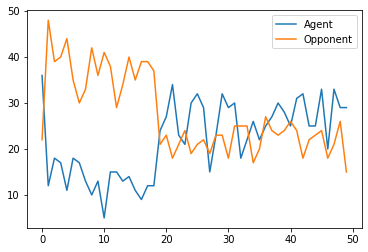

In [15]:
import matplotlib.pyplot as plt   ## Plotting number of matches won by agent and opponent during seeing efficacy while training
ax = np.arange(ef_test.shape[0])
plt.plot(ax,ef_test[:,0],label = 'Agent')
plt.plot(ax,ef_test[:,1],label = 'Opponent')
plt.legend()
plt.show()

In [28]:
###########
##TESTING##
###########

In [16]:
ntest = 1000
env.reset()
env.reset_tally()
s = 0
tl = np.zeros([ntest-1,2])

## Testing first half of total matches against random opponent

for i in range(0,int(ntest/2)):
    env.reset()
    print("Episode = ",i)
    s = 0
    a = epsilon_greedy(Q,s)
    state, reward, is_over, tally = env.act(a)
    state_tr = transform(state)
    a_set = action_set(state_tr)

    while(is_over!=1):
        state, reward, is_over, tally = env.act(np.random.choice(a_set))
        state_tr = transform(state)
        a_set = action_set(state_tr)
        s = map_state(state_tr)
        
        if(len(a_set) == 0):
            break;
        
        a = greedy(Q,s,a_set)
        state, reward, is_over, tally = env.act(a)
        state_tr = transform(state)
        sn = map_state(state_tr)
        a_set = action_set(state_tr)
    temp = env.print_tally()
    print("Our agent won ",temp[0]," matches, opponent won ",temp[1]," matches.")
    tl[i,0] = temp[0]
    tl[i,1] = temp[1]
    print(" ")
    
tl2 = []

## Testing second half of total matches against safe opponent

for i in range(0,int(ntest/2)):
    env.reset()
    print("Episode = ",500+i)
    s = 0
    a = epsilon_greedy(Q,s)
    state, reward, is_over, tally = env.act(a)
    state_tr = transform(state)
    a_set = action_set(state_tr)
    while(is_over!=1):
        a_choice = safe_choice(state,a_set)
        state, reward, is_over, tally = env.act(a_choice)
        state_tr = transform(state)
        a_set = action_set(state_tr)
        s = map_state(state_tr)
        
        if(len(a_set) == 0):
            break;
        
        a = greedy(Q,s,a_set)
        state, reward, is_over, tally = env.act(a)
        state_tr = transform(state)
        sn = map_state(state_tr)
        a_set = action_set(state_tr)
    temp = env.print_tally()
    print("Our agent won ",temp[0]," matches, opponent won ",temp[1]," matches.")
    tl[499+i,0] = temp[0]
    tl[499+i,1] = temp[1]
    print(" ")

Episode =  0
Player  1  wins the round
Our agent won  1  matches, opponent won  0  matches.
 
Episode =  1
Our agent won  1  matches, opponent won  0  matches.
 
Episode =  2
Player  1  wins the round
Our agent won  2  matches, opponent won  0  matches.
 
Episode =  3
Player  2  wins the round
Game Over
Our agent won  2  matches, opponent won  1  matches.
 
Episode =  4
Player  2  wins the round
Game Over
Our agent won  2  matches, opponent won  2  matches.
 
Episode =  5
Player  1  wins the round
Our agent won  3  matches, opponent won  2  matches.
 
Episode =  6
Player  2  wins the round
Game Over
Our agent won  3  matches, opponent won  3  matches.
 
Episode =  7
Player  1  wins the round
Our agent won  4  matches, opponent won  3  matches.
 
Episode =  8
Player  1  wins the round
Our agent won  5  matches, opponent won  3  matches.
 
Episode =  9
Player  2  wins the round
Game Over
Our agent won  5  matches, opponent won  4  matches.
 
Episode =  10
Player  2  wins the round
Game O

Player  1  wins the round
Our agent won  86  matches, opponent won  49  matches.
 
Episode =  151
Player  2  wins the round
Game Over
Our agent won  86  matches, opponent won  50  matches.
 
Episode =  152
Player  1  wins the round
Our agent won  87  matches, opponent won  50  matches.
 
Episode =  153
Player  1  wins the round
Our agent won  88  matches, opponent won  50  matches.
 
Episode =  154
Player  1  wins the round
Our agent won  89  matches, opponent won  50  matches.
 
Episode =  155
Player  1  wins the round
Our agent won  90  matches, opponent won  50  matches.
 
Episode =  156
Player  1  wins the round
Our agent won  91  matches, opponent won  50  matches.
 
Episode =  157
Player  1  wins the round
Our agent won  92  matches, opponent won  50  matches.
 
Episode =  158
Player  1  wins the round
Our agent won  93  matches, opponent won  50  matches.
 
Episode =  159
Player  1  wins the round
Our agent won  94  matches, opponent won  50  matches.
 
Episode =  160
Player  1 

Our agent won  164  matches, opponent won  90  matches.
 
Episode =  291
Player  1  wins the round
Our agent won  165  matches, opponent won  90  matches.
 
Episode =  292
Player  1  wins the round
Our agent won  166  matches, opponent won  90  matches.
 
Episode =  293
Player  1  wins the round
Our agent won  167  matches, opponent won  90  matches.
 
Episode =  294
Player  1  wins the round
Our agent won  168  matches, opponent won  90  matches.
 
Episode =  295
Player  1  wins the round
Our agent won  169  matches, opponent won  90  matches.
 
Episode =  296
Player  1  wins the round
Our agent won  170  matches, opponent won  90  matches.
 
Episode =  297
Player  2  wins the round
Game Over
Our agent won  170  matches, opponent won  91  matches.
 
Episode =  298
Player  1  wins the round
Our agent won  171  matches, opponent won  91  matches.
 
Episode =  299
Player  1  wins the round
Our agent won  172  matches, opponent won  91  matches.
 
Episode =  300
Player  2  wins the round


Our agent won  234  matches, opponent won  131  matches.
 
Episode =  414
Player  1  wins the round
Our agent won  235  matches, opponent won  131  matches.
 
Episode =  415
Player  2  wins the round
Game Over
Our agent won  235  matches, opponent won  132  matches.
 
Episode =  416
Player  2  wins the round
Game Over
Our agent won  235  matches, opponent won  133  matches.
 
Episode =  417
Player  1  wins the round
Our agent won  236  matches, opponent won  133  matches.
 
Episode =  418
Player  2  wins the round
Game Over
Our agent won  236  matches, opponent won  134  matches.
 
Episode =  419
Player  1  wins the round
Our agent won  237  matches, opponent won  134  matches.
 
Episode =  420
Player  2  wins the round
Game Over
Our agent won  237  matches, opponent won  135  matches.
 
Episode =  421
Player  2  wins the round
Game Over
Our agent won  237  matches, opponent won  136  matches.
 
Episode =  422
Our agent won  237  matches, opponent won  136  matches.
 
Episode =  423
Ou

Player  1  wins the round
Our agent won  285  matches, opponent won  171  matches.
 
Episode =  538
Player  2  wins the round
Game Over
Our agent won  285  matches, opponent won  172  matches.
 
Episode =  539
Our agent won  285  matches, opponent won  172  matches.
 
Episode =  540
Our agent won  285  matches, opponent won  172  matches.
 
Episode =  541
Player  1  wins the round
Our agent won  286  matches, opponent won  172  matches.
 
Episode =  542
Our agent won  286  matches, opponent won  172  matches.
 
Episode =  543
Player  2  wins the round
Game Over
Our agent won  286  matches, opponent won  173  matches.
 
Episode =  544
Our agent won  286  matches, opponent won  173  matches.
 
Episode =  545
Our agent won  286  matches, opponent won  173  matches.
 
Episode =  546
Player  1  wins the round
Our agent won  287  matches, opponent won  173  matches.
 
Episode =  547
Our agent won  287  matches, opponent won  173  matches.
 
Episode =  548
Our agent won  287  matches, opponen

Episode =  696
Player  1  wins the round
Our agent won  331  matches, opponent won  217  matches.
 
Episode =  697
Our agent won  331  matches, opponent won  217  matches.
 
Episode =  698
Player  2  wins the round
Game Over
Our agent won  331  matches, opponent won  218  matches.
 
Episode =  699
Player  2  wins the round
Game Over
Our agent won  331  matches, opponent won  219  matches.
 
Episode =  700
Player  1  wins the round
Our agent won  332  matches, opponent won  219  matches.
 
Episode =  701
Player  2  wins the round
Game Over
Our agent won  332  matches, opponent won  220  matches.
 
Episode =  702
Our agent won  332  matches, opponent won  220  matches.
 
Episode =  703
Our agent won  332  matches, opponent won  220  matches.
 
Episode =  704
Our agent won  332  matches, opponent won  220  matches.
 
Episode =  705
Our agent won  332  matches, opponent won  220  matches.
 
Episode =  706
Our agent won  332  matches, opponent won  220  matches.
 
Episode =  707
Our agent w

Player  1  wins the round
Our agent won  357  matches, opponent won  249  matches.
 
Episode =  817
Our agent won  357  matches, opponent won  249  matches.
 
Episode =  818
Player  1  wins the round
Our agent won  358  matches, opponent won  249  matches.
 
Episode =  819
Our agent won  358  matches, opponent won  249  matches.
 
Episode =  820
Player  1  wins the round
Our agent won  359  matches, opponent won  249  matches.
 
Episode =  821
Player  2  wins the round
Game Over
Our agent won  359  matches, opponent won  250  matches.
 
Episode =  822
Player  1  wins the round
Our agent won  360  matches, opponent won  250  matches.
 
Episode =  823
Our agent won  360  matches, opponent won  250  matches.
 
Episode =  824
Player  1  wins the round
Our agent won  361  matches, opponent won  250  matches.
 
Episode =  825
Player  2  wins the round
Game Over
Our agent won  361  matches, opponent won  251  matches.
 
Episode =  826
Our agent won  361  matches, opponent won  251  matches.
 

Our agent won  403  matches, opponent won  287  matches.
 
Episode =  975
Our agent won  403  matches, opponent won  287  matches.
 
Episode =  976
Our agent won  403  matches, opponent won  287  matches.
 
Episode =  977
Player  1  wins the round
Our agent won  404  matches, opponent won  287  matches.
 
Episode =  978
Our agent won  404  matches, opponent won  287  matches.
 
Episode =  979
Player  1  wins the round
Our agent won  405  matches, opponent won  287  matches.
 
Episode =  980
Our agent won  405  matches, opponent won  287  matches.
 
Episode =  981
Our agent won  405  matches, opponent won  287  matches.
 
Episode =  982
Our agent won  405  matches, opponent won  287  matches.
 
Episode =  983
Player  2  wins the round
Game Over
Our agent won  405  matches, opponent won  288  matches.
 
Episode =  984
Player  1  wins the round
Our agent won  406  matches, opponent won  288  matches.
 
Episode =  985
Our agent won  406  matches, opponent won  288  matches.
 
Episode =  98

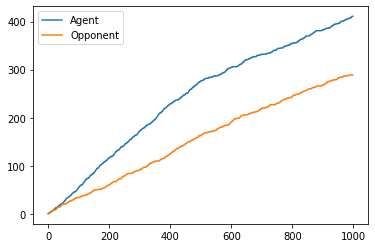

In [17]:
import matplotlib.pyplot as plt   #### Plotting number of matches won by agent and opponent during testing
ax = np.arange(ntest-1)
plt.plot(ax,tl[:,0],label='Agent')
plt.plot(ax,tl[:,1],label='Opponent')
plt.legend()
plt.show()